In [69]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data

df = pd.read_csv("/Users/aashishbharadwaj/Desktop/mlproject/notebook/data/stud.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#check shape

df.shape

(1000, 8)

In [6]:
#check missing value

df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
#check duplicates

df.duplicated().sum()

0

In [9]:
#check dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
#ckeck unique values

df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [12]:
#check statistics

df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [27]:
#cleaning column names

df.columns = df.columns.str.replace(' ', '_')    
df.columns = df.columns.str.replace('/', '_')  
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [29]:
print(f"gender - {df['gender'].unique()}")
print(f"race_ethnicity - {df['race_ethnicity'].unique()}")
print(f"parental_level_of_education - {df['parental_level_of_education'].unique()}")
print(f"lunch - {df['lunch'].unique()}")
print(f"test_preparation_course - {df['test_preparation_course'].unique()}")

gender - ['female' 'male']
race_ethnicity - ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education - ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch - ['standard' 'free/reduced']
test_preparation_course - ['none' 'completed']


In [48]:
#defining numerical and categorical values

categorical_features = df.select_dtypes(include='object')
numerical_features = df.select_dtypes(include='number')

print(f"We have {len(categorical_features.T)} categorical features")
print(f"We have {len(numerical_features.T)} numeric features")

We have 5 categorical features
We have 3 numeric features


In [51]:
#adding total score and average score

df["total_score"] = df["math_score"]+df["reading_score"]+df["writing_score"]
df["average_score"] = df["total_score"]/3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [61]:
math_full = df[df["math_score"]==100]['average_score'].count()
reading_full = df[df["reading_score"]==100]['average_score'].count()
writing_full = df[df["writing_score"]==100]['average_score'].count()

print(f"Number of students who scored full in math is {math_full}")
print(f"Number of students who scored full in reading is {reading_full}")
print(f"Number of students who scored full in writing is {writing_full}")

Number of students who scored full in math is 7
Number of students who scored full in reading is 17
Number of students who scored full in writing is 14


In [62]:
math_less_25 = df[df["math_score"]<=25]['average_score'].count()
reading_less_25 = df[df["reading_score"]<=25]['average_score'].count()
writing_less_25 = df[df["writing_score"]<=25]['average_score'].count()

print(f"Number of students who scored less than or equal to 25 in math is {math_less_25}")
print(f"Number of students who scored less than or equal to 25 in reading is {reading_less_25}")
print(f"Number of students who scored less than or equal to 25 in writing is {writing_less_25}")

Number of students who scored less than or equal to 25 in math is 7
Number of students who scored less than or equal to 25 in reading is 4
Number of students who scored less than or equal to 25 in writing is 5


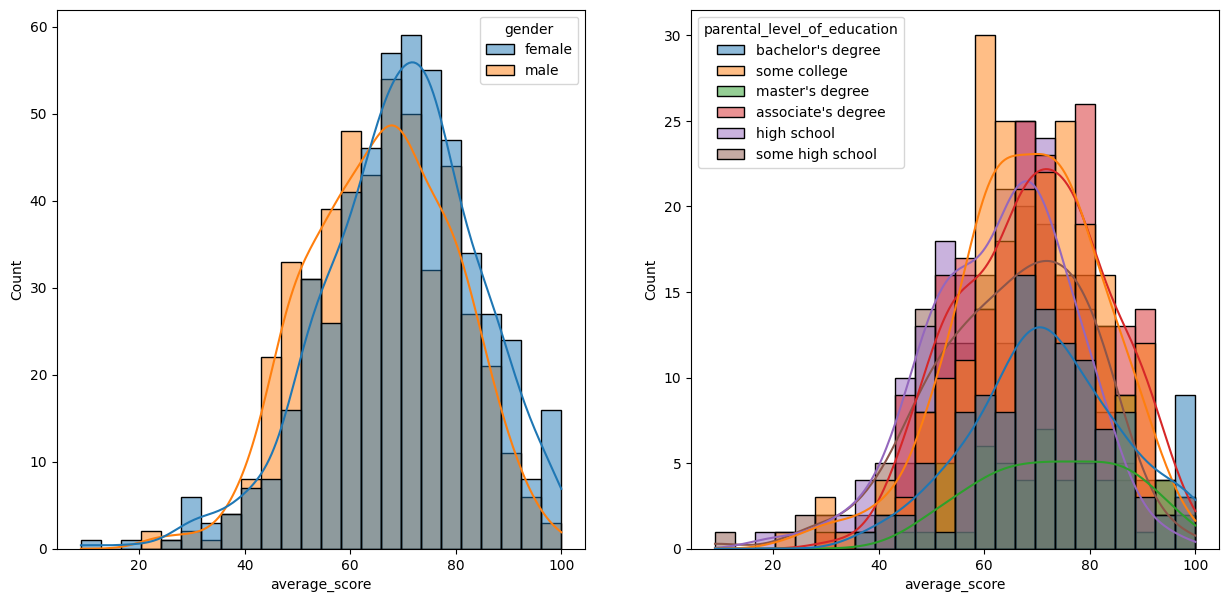

In [100]:
plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x = 'average_score',hue='gender', kde=True)
plt.subplot(122)
sns.histplot(data=df, x = 'average_score',hue='parental_level_of_education', kde=True)
plt.show()

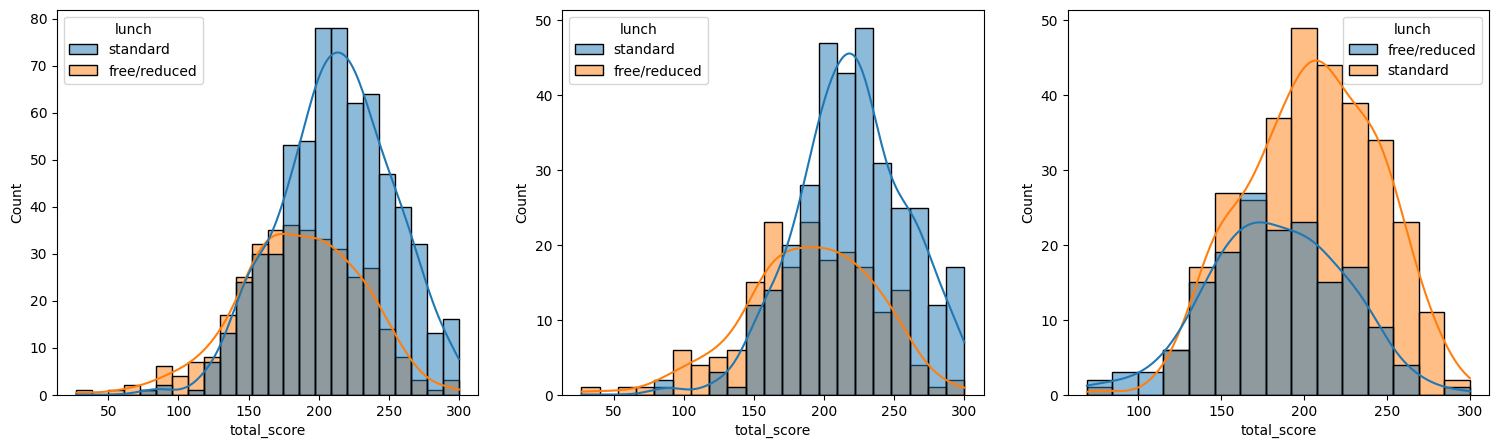

In [105]:
plt.subplots(1,2,figsize=(25,5))
plt.subplot(141)
sns.histplot(data=df, x='total_score', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df["gender"]=='female'], x='total_score', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df["gender"]=='male'], x='total_score', kde=True, hue='lunch')
plt.show()

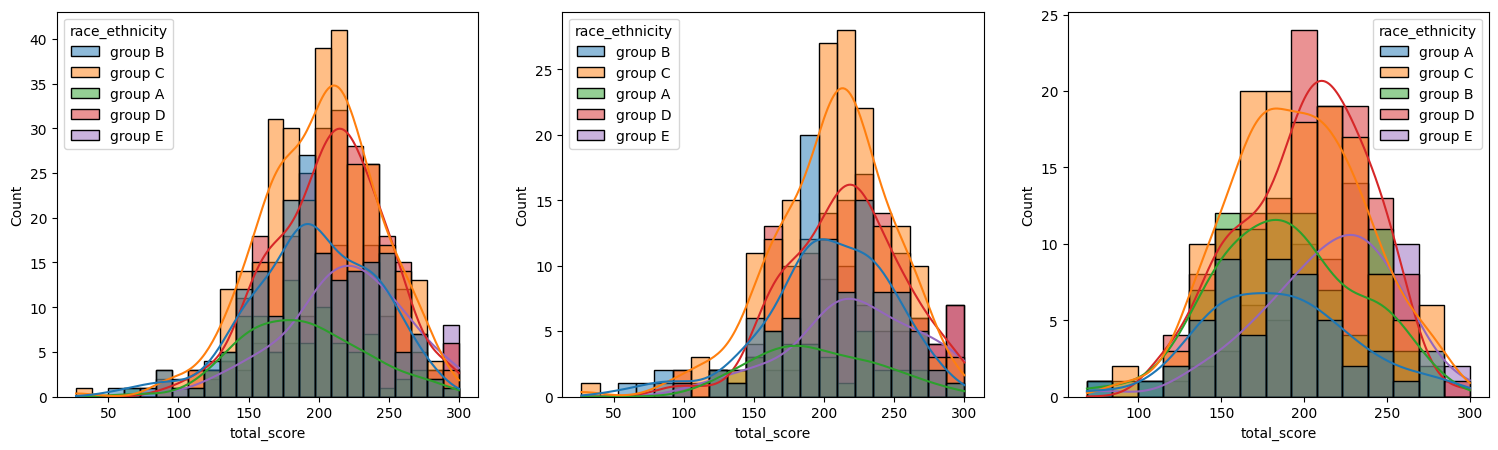

In [104]:
plt.subplots(1,2,figsize=(25,5))
plt.subplot(141)
sns.histplot(data=df, x='total_score', kde=True, hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df["gender"]=='female'], x='total_score', kde=True, hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df["gender"]=='male'], x='total_score', kde=True, hue='race_ethnicity')
plt.show()